#### Name :  Yogesh Siral
#### PRN  :  240340128037


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import seaborn as sns
from sklearn import datasets
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report, log_loss

In [2]:
###----------------
### Some parameters
###----------------

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE)
rng = np.random.default_rng(seed = RANDOM_STATE) # Set Random Seed for reproducible  results

NOISE = 0.2
EPOCHS = 4000 # number of epochs
ALPHA = 0.1  # learning rate
N_SAMPLES = 1000
TEST_SIZE=0.2

# parameters for Matplotlib
params = {'legend.fontsize': 'medium',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'large',
          'axes.titlesize':'large',
          'xtick.labelsize':'large',
          'ytick.labelsize':'large'
         }

plt.rcParams.update(params)

CMAP = plt.cm.coolwarm
plt.style.use('seaborn-v0_8-darkgrid') # plt.style.use('ggplot')

In [3]:
X, y = datasets.make_moons(n_samples=N_SAMPLES, 
                           shuffle=True, 
                           noise=NOISE, 
                           random_state=RANDOM_STATE)
X[:5], y[:5]

(array([[ 0.90633951,  0.90267624],
        [-1.11536828,  0.75579289],
        [ 1.88769158,  0.4175967 ],
        [-0.93345034, -0.02299851],
        [-0.96872877,  0.06396285]]),
 array([0, 0, 1, 0, 0], dtype=int64))

## Visualization
<p style="font-family: Arial; font-size:1.2em">
DataFrames are easier to visualize
</p>

In [4]:
data_df = pd.DataFrame(X, columns = ['A', 'B'])

data_df['target'] = y

data_df.head()

,A,B,target
0,0.906340,0.902676,0
1,-1.115368,0.755793,0
2,1.887692,0.417597,1
3,-0.933450,-0.022999,0
4,-0.968729,0.063963,0


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1000 non-null   float64
 1   B       1000 non-null   float64
 2   target  1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [6]:
data_df.describe() # Generate descriptive statistic

,A,B,target
count,1000.000000,1000.000000,1000.00000
mean,0.490841,0.239025,0.50000
std,0.898951,0.540082,0.50025
min,-1.688795,-0.955280,0.00000
25%,-0.149565,-0.205090,0.00000
50%,0.500100,0.241163,0.50000
75%,1.095048,0.680394,1.00000
max,2.419113,1.612075,1.00000


In [7]:
# what labels are present?
data_df.target.unique()

array([0, 1], dtype=int64)

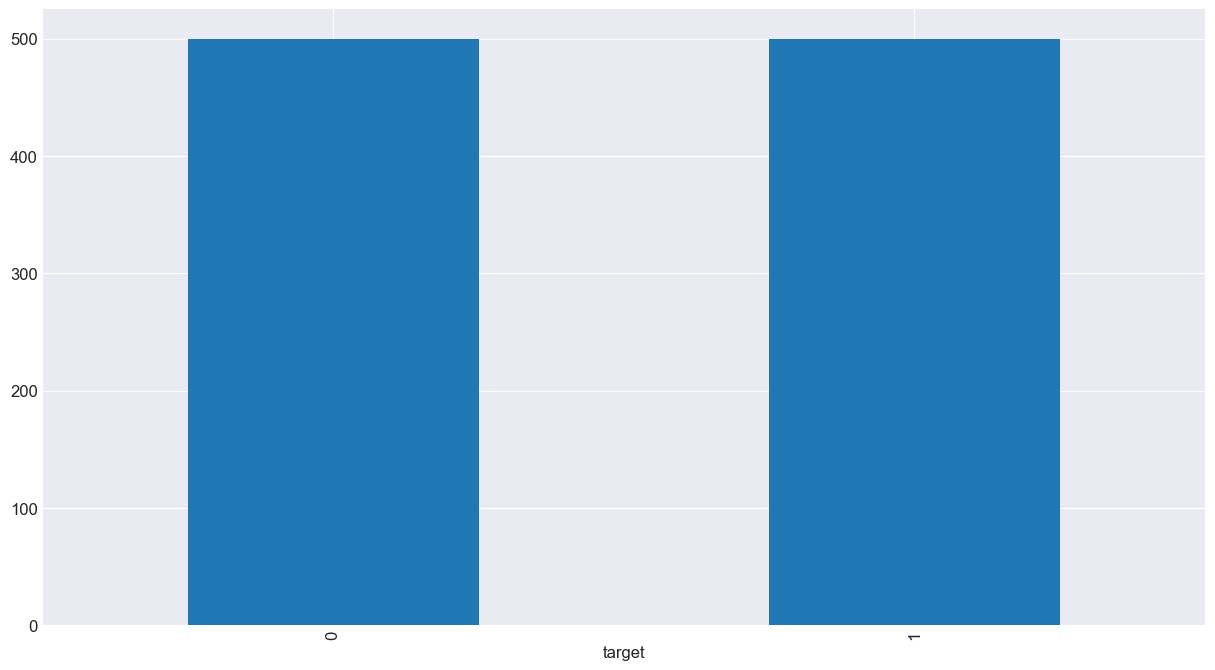

In [8]:
fig, ax = plt.subplots() # Instantiate
    
data_df['target'].value_counts().plot(ax=ax, kind='bar');

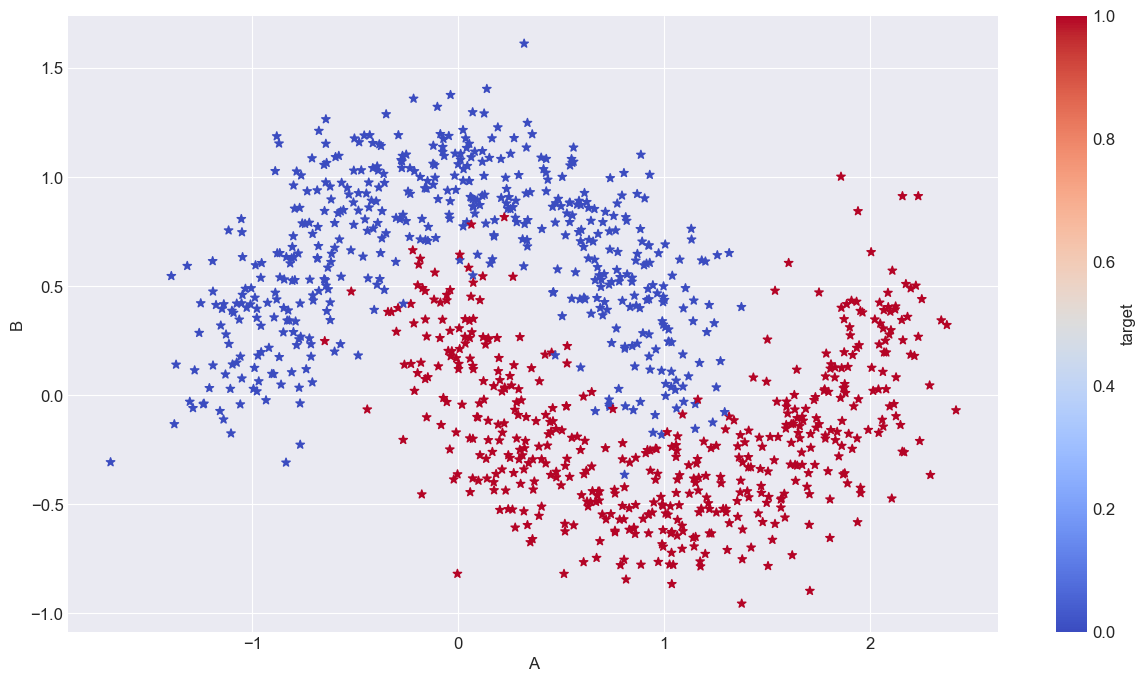

In [9]:
# Plot the data
data_df.plot.scatter('A', 'B',      # columns to plot
                     s = 40,        # size of the marker
                     marker = '*',  # type of marker
                     c = 'target',  # color as per target column
                     cmap=CMAP);    # using colormap

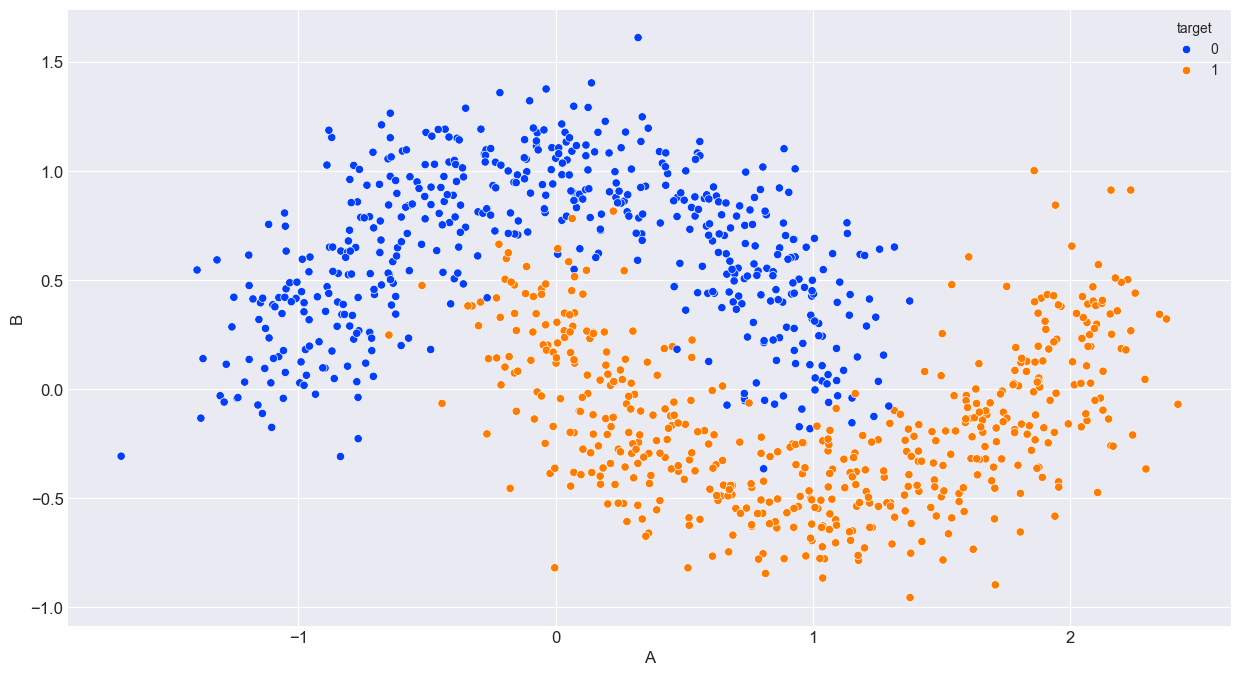

In [10]:
# Using Seaborn
ax = sns.scatterplot(data=data_df, # data from dataframe
                     x='A', y='B',  # X axis and y axis columns
                     palette=sns.color_palette("bright", 2), # color map
                     hue='target'); # Color as per target column

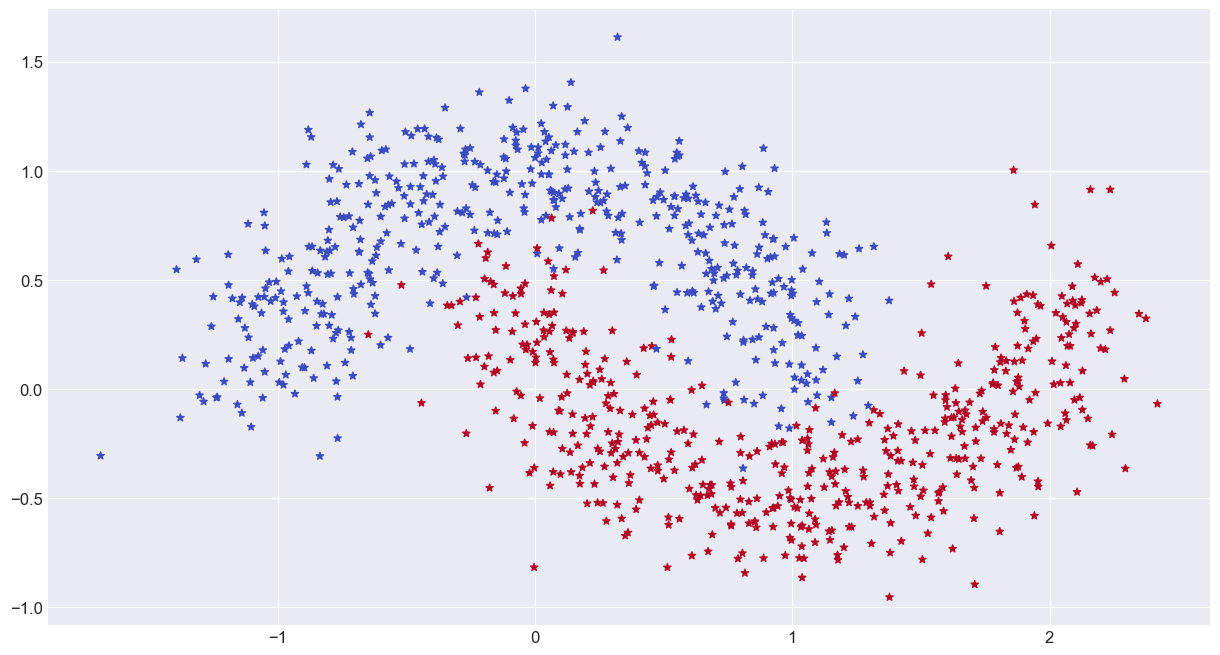

In [11]:
#### In case you want to plot X Array directly
plt.scatter(X[:,0], X[:,1], s=30, c=y, marker = '*', cmap=CMAP);

In [12]:
y = pd.get_dummies(y).to_numpy()
y

array([[ True, False],
       [ True, False],
       [False,  True],
       ...,
       [ True, False],
       [False,  True],
       [ True, False]])

In [13]:
y.shape

(1000, 2)

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=TEST_SIZE,random_state=RANDOM_STATE,stratify=y)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800, 2), (200, 2))

In [16]:
# type(data_train)

In [17]:
# data_train[0]

In [18]:
# weights = rng.random(data_train.shape[1])
# # w0,w1,w2
# # Z = x*w+b
# # Z= weights[0]
# weights

In [19]:
# Softmax function
def fn_softmax(z):
    exp_z = np.exp(z)
    return exp_z/np.sum(exp_z,axis=1,keepdims=True)

In [20]:
sm = fn_softmax(np.asarray([[8,5,0],[-10,0,10]]))
#sm.shape
sm.sum(axis=1).shape

(2,)

In [21]:
def fn_activ(z):
    return np.tanh(z)
def fn_activ_prime(a):
    return 1. -np.tanh(a)**2

In [22]:
def predict(model,X_p):
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
    W2 = model['W2']
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']

    b1  =  model["b1"]
    b2  =  model["b2"]
    b3  =  model["b3"]
    b4  =  model["b4"]
    b5  =  model["b5"]

# Layer1 
    z1 = X_p.dot(W1)+b1  # Aggregation   z = X.W +b
    a1 = fn_activ(z1)     # Activation  a=g(z)

    #Layer 2
    z2=a1.dot(W2)+b2    # Aggregation  z = X.W +b
    a2=fn_activ(z2)   # Activation  a=g(z)

    # Layer 3 
    z3 = a2.dot(W3)+b3  # Aggregation   z = X.W +b
    a3 = fn_activ(z3)     # Activation  a=g(z)

    # Layer 4 
    z4 = a3.dot(W4)+b4  # Aggregation   z = X.W +b
    a4 = fn_activ(z4)     # Activation  a=g(z)

    # Layer 5
    z5 = a4.dot(W5)+b5  # Aggregation   z = X.W +b
    a5 = fn_softmax(z5)     # Activation  a=g(z)

    return np.argmax(a5,axis=1) #Pick index of class with highest probability
    

In [23]:
def calculate_loss(model,X_l,y_l):
    m=X_l.shape[0]
    W1,b1,W2,b2 = model['W1'],model['b1'],model['W2'],model['b2']
   
    W3 = model['W3']
    W4 = model['W4']
    W5 = model['W5']
    W6 = model['W6']
    W7 = model['W7']
    W8 = model['W8']


  
    b3  =  model["b3"]
    b4  =  model["b4"]
    b5  =  model["b5"]
    b6  =  model["b6"]
    b7  =  model["b7"]
    b8  =  model["b8"]

# Layer1 
  
    ### Forward Propogation
    # Layer1 
    z1 = X_l.dot(W1)+b1  # Aggregation
    a1 = fn_activ(z1)  # Activation

    #Layer 2
    z2=a1.dot(W2)+b2  # Aggregation
    a2=fn_activ(z2)    # Activation

    # Layer 3 
    z3 = a2.dot(W3)+b3  # Aggregation   z = X.W +b
    a3 = fn_activ(z3)     # Activation  a=g(z)

    # Layer 4 
    z4 = a3.dot(W4)+b4  # Aggregation   z = X.W +b
    a4 = fn_activ(z4)     # Activation  a=g(z)

    # Layer 5
    z5 = a4.dot(W5)+b5  # Aggregation   z = X.W +b
    a5 = fn_activ(z5)     # Activation  a=g(z)

    # Layer 5
    z6 = a5.dot(W6)+b6  # Aggregation   z = X.W +b
    a6 = fn_activ(z6)     # Activation  a=g(z)

    # Layer 7
    z7 = a6.dot(W7)+b7  # Aggregation   z = X.W +b
    a7 = fn_activ(z7)     # Activation  a=g(z)

    # Layer 8
    z8 = a7.dot(W8)+b8  # Aggregation   z = X.W +b
    a8 = fn_softmax(z8)     # Activation  a=g(z)

    data_loss = -((y_l)*np.log(a8) + (1-y_l)*np.log(1-a8)).sum() # Binary

    return data_loss / m

In [24]:
# wgts  = np.array([0.1,2.0,1.0])
# predict(data_train[0],wgts)

In [32]:
X_train.shape[1]

2

# Multiple Layer
* Layer 1 - 5 - Tanh
* Layer 2 - 5 - Tanh
* Layer 3 - 4 - Tanh
* Layer 4 - 3 - Tanh
* Output Layer

In [26]:
# Model parameters to build the models
param = {}
param['nn_dim'] = [X_train.shape[1],10, 8, 8, 7, 6, 5, 2]  # Node nums
loss_hist={}

In [27]:
def build_model(param, X_tr, y_tr, nn_out, alpha=ALPHA ,epochs = EPOCHS):
    '''
    Args:
        X_tr : Training features
        y_tr : Training labels
        nn_hdim : Number of nodes in the hidden layer
        nn_out : Size of output
    '''
    m = X_tr.shape[0] # no. of rows, no. of inputs
    nn_output_dim = nn_out

    # Layer 1
    # size = 2,2
    W1 = np.random.rand(param['nn_dim'][0],
                        param['nn_dim'][1]) / np.sqrt(param['nn_dim'][0])
    # size = 5
    b1 = np.zeros((1, param['nn_dim'][1]), dtype= np.float32)

    # Layer 2
    # size = 5,10
    W2 = np.random.rand(param['nn_dim'][1],
                        param['nn_dim'][2]) / np.sqrt(param['nn_dim'][1])
    # size = 5
    b2 = np.zeros((1, param['nn_dim'][2]), dtype= np.float32)

    # Layer 3
    # size = 5,8
    W3 = np.random.rand(param['nn_dim'][2],
                        param['nn_dim'][3]) / np.sqrt(param['nn_dim'][2])
    # size = 5
    b3 = np.zeros((1, param['nn_dim'][3]), dtype= np.float32)

    # Layer 4
    # size = 4,8
    W4 = np.random.rand(param['nn_dim'][3],
                        param['nn_dim'][4]) / np.sqrt(param['nn_dim'][3])
    # size = 5
    b4 = np.zeros((1, param['nn_dim'][4]), dtype= np.float32)

    # Layer 5
    # size = 4,7
    W5 = np.random.rand(param['nn_dim'][4],
                        param['nn_dim'][5]) / np.sqrt(param['nn_dim'][4])
    # size = 5
    b5 = np.zeros((1, param['nn_dim'][5]), dtype= np.float32)

    # Layer 6
    # size = 4,6
    W6 = np.random.rand(param['nn_dim'][5],
                        param['nn_dim'][6]) / np.sqrt(param['nn_dim'][5])
    # size = 5
    b6 = np.zeros((1, param['nn_dim'][6]), dtype= np.float32)

    # Layer 7
    # size = 4,5
    W7 = np.random.rand(param['nn_dim'][6],
                        param['nn_dim'][7]) / np.sqrt(param['nn_dim'][6])
    # size = 5
    b7 = np.zeros((1, param['nn_dim'][7]), dtype= np.float32)

    # Layer 8
    # size = 4,2
    W8 = np.random.rand(param['nn_dim'][7],
                        nn_output_dim) / np.sqrt(param['nn_dim'][7])
    # size = 2
    b8 = np.zeros((1, nn_output_dim), dtype= np.float32)

    curr_loss = 0
    loss, epoch = [], []

    for i in range(0, epochs):
        ### Forward Propagation

        # Layer 1
        z1 = X_tr.dot(W1) + b1 # Aggregation
        a1 = fn_activ(z1) # Activation 

        # Layer 2
        z2 = a1.dot(W2) + b2 # Aggregation
        a2 = fn_activ(z2) # Activation 

        # Layer 3
        z3 = a2.dot(W3) + b3 # Aggregation
        a3 = fn_activ(z3) # Activation 

        # Layer 4
        z4 = a3.dot(W4) + b4 # Aggregation
        a4 = fn_activ(z4) # Activation 

        # Layer 4
        z5 = a4.dot(W5) + b5 # Aggregation
        a5 = fn_activ(z5) # Activation 

        # Layer 4
        z6 = a5.dot(W6) + b6 # Aggregation
        a6 = fn_activ(z6) # Activation 

        # Layer 4
        z7 = a6.dot(W7) + b7 # Aggregation
        a7 = fn_activ(z7) # Activation 

        # Layer 8
        z8 = a7.dot(W8) + b8 # Aggregation
        a8 = fn_softmax(z8)  # Activation 

    
        ### Back Propagation 
        # Layer 8
        assert (a8.shape == y_tr.shape), f'check y {a8.shape}/{y_tr.shape}'
        dz8 = a8 - y_tr ## REMEMBER dim of a2 and y_tr to be same

        dW8 = (a7.T).dot(dz8)
        assert(W8.shape == dW8.shape), f'check W8 {W8.shape}/{dW8.shape}'

        db8 = np.sum(dz8, axis= 0 , keepdims = True)
        assert(b8.shape == db8.shape), f'check b8 {b8.shape}/{db8.shape}'

        da7 = dz8.dot(W5.T)
        assert(a7.shape == da7.shape), f'check a7 {a7.shape}/{da7.shape}'

        # Layer 7
        dz7 = da7 * fn_activ_prime(z7)
        assert(z7.shape == dz7.shape), f'check z7 {z7.shape}/{dz7.shape}'
    
        dW7 = (a6.T).dot(dz7)
        assert(W7.shape == dW7.shape), f'check W7 {W7.shape}/{dW7.shape}'

        db7 = np.sum(dz7, axis= 0 , keepdims = True)
        assert(b7.shape == db7.shape), f'check b7 {b7.shape}/{db7.shape}'

        da6 = dz7.dot(W7.T)
        assert(a6.shape == da6.shape), f'check a6 {a6.shape}/{da6.shape}'

        # Layer 6
        dz6 = da6 * fn_activ_prime(z6)
        assert(z6.shape == dz6.shape), f'check z6 {z6.shape}/{dz6.shape}'
    
        dW6 = (a5.T).dot(dz6)
        assert(W4.shape == dW4.shape), f'check W6 {W6.shape}/{dW6.shape}'

        db6 = np.sum(dz6, axis= 0 , keepdims = True)
        assert(b6.shape == db6.shape), f'check b6 {b6.shape}/{db6.shape}'

        da5 = dz6.dot(W4.T)
        assert(a5.shape == da5.shape), f'check a5 {a5.shape}/{da5.shape}'

        # Layer 5
        dz5 = da5 * fn_activ_prime(z5)
        assert(z5.shape == dz5.shape), f'check z5 {z5.shape}/{dz5.shape}'
    
        dW5 = (a4.T).dot(dz5)
        assert(W5.shape == dW5.shape), f'check W5 {W5.shape}/{dW5.shape}'

        db5 = np.sum(dz5, axis= 0 , keepdims = True)
        assert(b5.shape == db5.shape), f'check b5 {b5.shape}/{db5.shape}'

        da4 = dz5.dot(W5.T)
        assert(a4.shape == da4.shape), f'check a4 {a4.shape}/{da4.shape}'

        # Layer 4
        dz4 = da4 * fn_activ_prime(z4)
        assert(z4.shape == dz4.shape), f'check z4 {z4.shape}/{dz4.shape}'
    
        dW4 = (a3.T).dot(dz4)
        assert(W4.shape == dW4.shape), f'check W4 {W4.shape}/{dW4.shape}'

        db4 = np.sum(dz4, axis= 0 , keepdims = True)
        assert(b4.shape == db4.shape), f'check b4 {b4.shape}/{db4.shape}'

        da3 = dz4.dot(W4.T)
        assert(a3.shape == da3.shape), f'check a3 {a3.shape}/{da3.shape}'
        
        # Layer 3
        dz3 = da3 * fn_activ_prime(z3)
        assert(z3.shape == dz3.shape), f'check z3 {z3.shape}/{dz3.shape}'
    
        dW3 = (a2.T).dot(dz3)
        assert(W3.shape == dW3.shape), f'check W3 {W3.shape}/{dW3.shape}'

        db3 = np.sum(dz3, axis= 0 , keepdims = True)
        assert(b3.shape == db3.shape), f'check b3 {b3.shape}/{db3.shape}'
        
        da2 = dz3.dot(W3.T)
        assert(a2.shape == da2.shape), f'check a2 {a2.shape}/{da2.shape}'
        
        # Layer 2
        dz2 = da2 * fn_activ_prime(z2)
        assert(z2.shape == dz2.shape), f'check z2 {z2.shape}/{dz2.shape}'
    
        dW2 = (a1.T).dot(dz2)
        assert(W2.shape == dW2.shape), f'check W2 {W2.shape}/{dW2.shape}'

        db2 = np.sum(dz2, axis= 0 , keepdims = True)
        assert(b2.shape == db2.shape), f'check b2 {b2.shape}/{db2.shape}'
        
        da1 = dz2.dot(W2.T)
        assert(a1.shape == da1.shape), f'check a1 {a1.shape}/{da1.shape}'
        
        # Layer 1
        dz1 = da1 * fn_activ_prime(z1)
        assert(z1.shape == dz1.shape), f'check z1 {z1.shape}/{dz1.shape}'
    
        dW1 = (X_tr.T).dot(dz1)
        assert(W1.shape == dW1.shape), f'check W1 {W1.shape}/{dW1.shape}'

        db1 = np.sum(dz1, axis= 0 , keepdims = True)
        assert(b1.shape == db1.shape), f'check b1 {b1.shape}/{db1.shape}'


        # Gradient Update
        W1 += -alpha * dW1/m
        b1 += -alpha * db1/m

        W2 += -alpha * dW2/m
        b2 += -alpha * db2/m
        
        W3 += -alpha * dW3/m
        b3 += -alpha * db3/m
        
        W4 += -alpha * dW4/m
        b4 += -alpha * db4/m
        
        W5 += -alpha * dW5/m
        b5 += -alpha * db5/m
        

        model = {'W1': W1, 'b1' : b1,
                 'W2': W2, 'b2' : b2,
                 'W3': W3, 'b3' : b3,
                 'W4': W4, 'b4' : b4,
                 'W5': W5, 'b5' : b5
                 }
    
        curr_loss = calculate_loss(model, X_tr, y_tr)
        loss.append(curr_loss)
        epoch.append(i)
        if i%1000 == 0:
            print(f'After epoch: {i:3d}; loss: {curr_loss: .5f}')

    loss_hist['epoch'] = epoch
    loss_hist['loss'] = loss

    return model

In [28]:
nn_output_dim=2
model = build_model(param,X_train,y_train,nn_output_dim)

ValueError: shapes (800,8) and (5,4) not aligned: 8 (dim 1) != 5 (dim 0)

In [ ]:
model

{'W1': array([[ 0.73010313,  2.34100649,  0.67856635,  0.71772662,  0.68743868],
        [-0.31808215,  0.27308121, -0.33995908, -0.35644264, -0.33733194]]),
 'b1': array([[ 0.27617168, -1.1384962 , -0.22295934, -0.38872617, -0.36622095]],
       dtype=float32),
 'W2': array([[ 0.35201956,  0.10307748,  0.31495783,  0.49741181,  0.2212727 ],
        [-1.17942534, -0.34269585, -0.74343722, -1.0233482 , -0.57469609],
        [ 0.55358916,  0.10555656,  0.29337733,  0.4233775 ,  0.41978703],
        [ 0.62896164,  0.42686836,  0.3500825 ,  0.45436854,  0.15333948],
        [ 0.43411831,  0.34337731,  0.41244679,  0.38760172,  0.34172646]]),
 'b2': array([[-0.06736012, -0.02009373, -0.04253511, -0.0953799 ,  0.03835173]],
       dtype=float32),
 'W3': array([[0.5744738 , 0.66553389, 0.5106771 , 0.68945906],
        [0.22673081, 0.18074231, 0.24812036, 0.05464262],
        [0.27851426, 0.2980092 , 0.32180419, 0.52787169],
        [0.45328661, 0.50498697, 0.58043039, 0.58488496],
        [0.

In [ ]:
# loss_hist

<Axes: xlabel='epoch'>

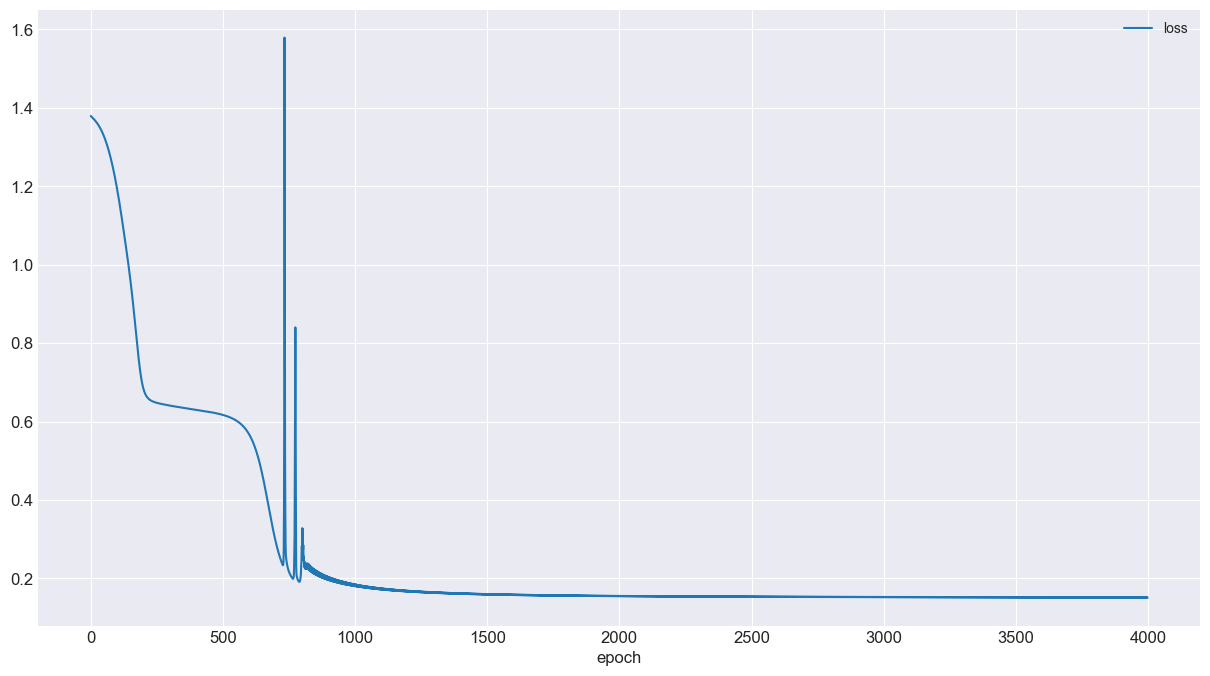

In [ ]:
pd.DataFrame(loss_hist).plot(x='epoch')

In [ ]:
y_pred = predict(model,X_train)
accuracy_score(y_train.argmax(axis=1),y_pred)

0.97125

ModuleNotFoundError: No module named 'tensorflow'

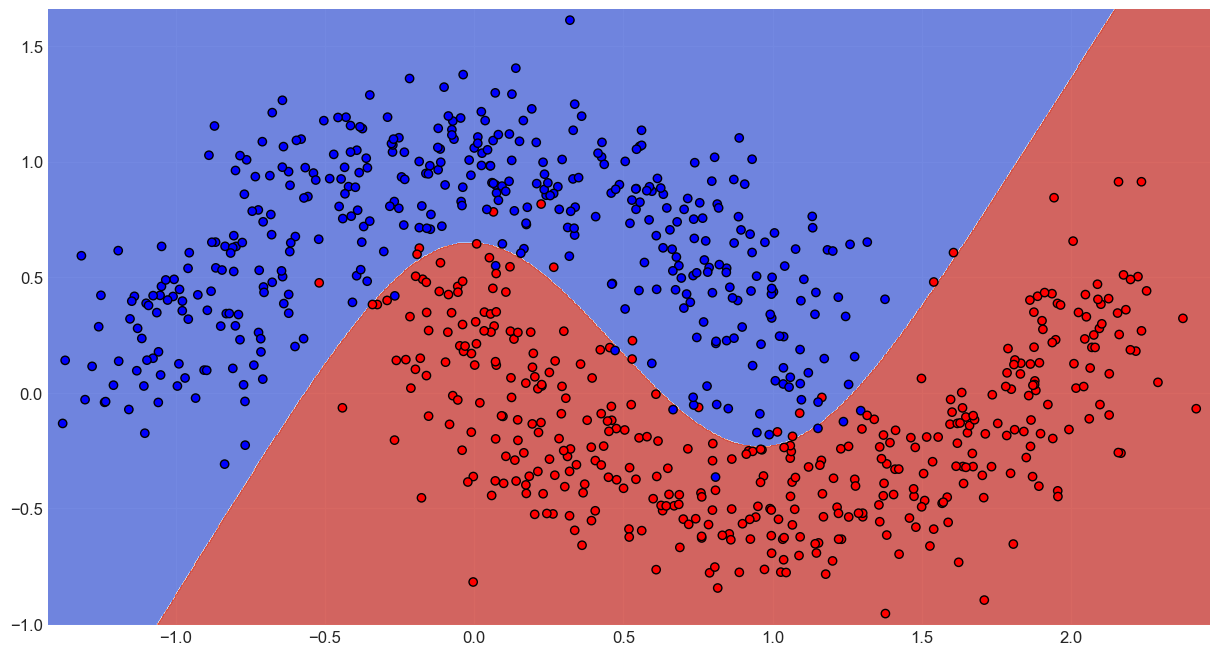

In [ ]:
X = X_train
fig,ax = plt.subplots()

dm = 0.005
x_min,x_max = X[:,0].min()-0.05,X[:,0].max()+0.05
y_min,y_max = X[:,1].min()-0.05,X[:,1].max()+0.05

xx,yy = np.meshgrid(np.arange(x_min,x_max,dm),
                    np.arange(y_min,y_max,dm))

XX = np.c_[xx.ravel(),yy.ravel()]
y_pred = predict(model,XX)


y_pred = predict(model,XX)
Z = np.array(y_pred).reshape(xx.shape)
ax.contourf(xx,yy,Z,cmap = CMAP,alpha=0.8)
ax.scatter(X[:,0],X[:,1],c=y_train.argmax(axis=1),edgecolors='k',cmap=plt.cm.bwr)

# Test Data

In [ ]:
y_pred = predict(model,X_test)
accuracy_score(y_test.argmax(axis=1),y_pred)

0.98

In [ ]:
cm = confusion_matrix(y_test.argmax(axis=1),y_pred)
cm

array([[99,  1],
       [ 3, 97]], dtype=int64)

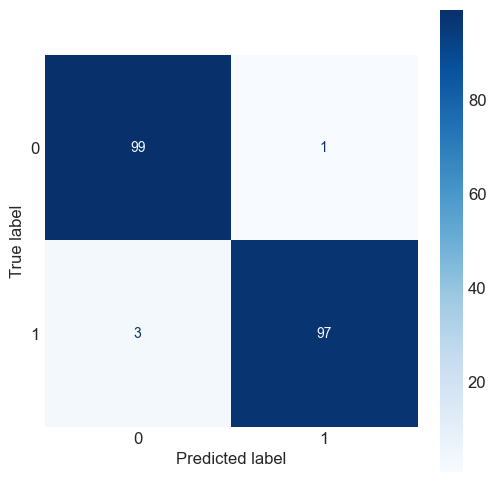

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=[0,1])
fig,ax = plt.subplots(figsize=(6,6))
disp.plot(ax=ax,cmap=plt.cm.Blues)
ax.grid(False)

In [ ]:
import tensorflow


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0
